In [1]:
import sys
sys.path.append("../")

In [2]:
import scipy
import scipy.spatial
from post_processing.src import hdf5_tools
from post_processing.src import plotting
from post_processing.src import filter_joints
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import numpy as np
import multiprocessing
from platform import python_version
import h5py
import pathlib
import pandas as pd
import scipy.signal
import warnings
import logging

from post_processing.src import hdf5_tools
from post_processing.src import arm_length

#Options
params = {'text.usetex' : True,
          'font.size' : 8,
          'font.family' : 'Computer Modern Roman',
          }
plt.rcParams.update(params) 

%matplotlib inline 

In [3]:
target_dir=pathlib.Path("/media/mjsobrep/43CDA61E672B9161/pose/")
hdf5_file = h5py.File(target_dir/"smoothed_data.hdf5",'r')
train=pd.read_csv(target_dir/"train.csv")

In [4]:
train

Unnamed: 0  Unnamed: 0.1  record_id  age  bbt.z_left  bbt.z_right  \
0            9            10         23    4   -1.034091    -2.561644   
1           25            26         44    7   -3.071429   -10.169811   
2            3             4         15    5    0.396552     0.507463   
3           27            28         46   18   -3.764706    -3.712766   
4           28            29         48   15   -9.443038    -5.241379   
5           35            36         61   14   -4.355263    -2.400000   
6           36            37         63   14   -5.139241    -4.781609   
7           23            24         42   19   -1.647059    -2.436170   
8           24            25         43   14   -3.367089    -2.942529   
9           37            38         64   13   -2.365854    -2.481928   
10           1             2         13   62   -2.654321    -4.806818   
11           4             5         16   30   -2.535714    -5.162162   
12           5             6         17   34   -3.785714    -3.405405   
13           8             9         22   64   -4.753086    -1.056818   
14          11            12         28   49   -2.276316    -5.560000   
15          20            21         39   48   -3.197368    -3.826667   
16           2             3         14   31   -1.395062    -0.322222   
17          12            13         29   57   -0.461538     0.258427   
18          14            15         31   60   -3.531250    -3.492754   
19          15            16         32   29   -0.296875    -0.540541   
20          16            17         34   46   -1.000000     1.206522   
21          21            22         40   56    1.461538     0.483146   
22           0             1         12   75   -3.324324    -3.098592   
23           7             8         21   69   -8.641026    -3.154930   
24           6             7         20   81   -1.972973    -1.408451   
25          17            18         35   70   -3.042857    -1.085714   

      min_bbt  
0   -2.561644  
1  -10.169811  
2    0.396552  
3   -3.764706  
4   -9.443038  
5   -4.355263  
6   -5.139241  
7   -2.436170  
8   -3.367089  
9   -2.481928  
10  -4.806818  
11  -5.162162  
12  -3.785714  
13  -4.753086  
14  -5.560000  
15  -3.826667  
16  -1.395062  
17  -0.461538  
18  -3.531250  
19  -0.540541  
20  -1.000000  
21   0.483146  
22  -3.324324  
23  -8.641026  
24  -1.972973  
25  -3.042857

In [5]:
hdf5_tools.print_members(hdf5_file)    

003
003/simon_says
003/simon_says/0
003/simon_says/0/time
004
004/simon_says
004/simon_says/0
004/simon_says/0/covariance
004/simon_says/0/covariance/LElbow
004/simon_says/0/covariance/LShoulder
004/simon_says/0/covariance/LWrist
004/simon_says/0/covariance/RElbow
004/simon_says/0/covariance/RShoulder
004/simon_says/0/covariance/RWrist
004/simon_says/0/filtered
004/simon_says/0/filtered/LElbow
004/simon_says/0/filtered/LShoulder
004/simon_says/0/filtered/LWrist
004/simon_says/0/filtered/RElbow
004/simon_says/0/filtered/RShoulder
004/simon_says/0/filtered/RWrist
004/simon_says/0/raw
004/simon_says/0/raw/LElbow
004/simon_says/0/raw/LShoulder
004/simon_says/0/raw/LWrist
004/simon_says/0/raw/RElbow
004/simon_says/0/raw/RShoulder
004/simon_says/0/raw/RWrist
004/simon_says/0/smooth
004/simon_says/0/smooth/LElbow
004/simon_says/0/smooth/LShoulder
004/simon_says/0/smooth/LWrist
004/simon_says/0/smooth/RElbow
004/simon_says/0/smooth/RShoulder
004/simon_says/0/smooth/RWrist
004/simon_says/0/time

029/target_touch/1/covariance/left
029/target_touch/1/covariance/right
029/target_touch/1/filtered
029/target_touch/1/filtered/left
029/target_touch/1/filtered/right
029/target_touch/1/raw
029/target_touch/1/raw/left
029/target_touch/1/raw/right
029/target_touch/1/smooth
029/target_touch/1/smooth/left
029/target_touch/1/smooth/right
029/target_touch/1/time
030
030/simon_says
030/simon_says/0
030/simon_says/0/covariance
030/simon_says/0/covariance/LElbow
030/simon_says/0/covariance/LShoulder
030/simon_says/0/covariance/LWrist
030/simon_says/0/covariance/RElbow
030/simon_says/0/covariance/RShoulder
030/simon_says/0/covariance/RWrist
030/simon_says/0/filtered
030/simon_says/0/filtered/LElbow
030/simon_says/0/filtered/LShoulder
030/simon_says/0/filtered/LWrist
030/simon_says/0/filtered/RElbow
030/simon_says/0/filtered/RShoulder
030/simon_says/0/filtered/RWrist
030/simon_says/0/raw
030/simon_says/0/raw/LElbow
030/simon_says/0/raw/LShoulder
030/simon_says/0/raw/LWrist
030/simon_says/0/raw/RE

044/simon_says/0/filtered/LShoulder
044/simon_says/0/filtered/LWrist
044/simon_says/0/filtered/RElbow
044/simon_says/0/filtered/RShoulder
044/simon_says/0/filtered/RWrist
044/simon_says/0/raw
044/simon_says/0/raw/LElbow
044/simon_says/0/raw/LShoulder
044/simon_says/0/raw/LWrist
044/simon_says/0/raw/RElbow
044/simon_says/0/raw/RShoulder
044/simon_says/0/raw/RWrist
044/simon_says/0/smooth
044/simon_says/0/smooth/LElbow
044/simon_says/0/smooth/LShoulder
044/simon_says/0/smooth/LWrist
044/simon_says/0/smooth/RElbow
044/simon_says/0/smooth/RShoulder
044/simon_says/0/smooth/RWrist
044/simon_says/0/time
044/simon_says/1
044/simon_says/1/covariance
044/simon_says/1/covariance/LElbow
044/simon_says/1/covariance/LShoulder
044/simon_says/1/covariance/LWrist
044/simon_says/1/covariance/RElbow
044/simon_says/1/covariance/RShoulder
044/simon_says/1/covariance/RWrist
044/simon_says/1/filtered
044/simon_says/1/filtered/LElbow
044/simon_says/1/filtered/LShoulder
044/simon_says/1/filtered/LWrist
044/sim

504-1/simon_says/0/covariance/LElbow
504-1/simon_says/0/covariance/LShoulder
504-1/simon_says/0/covariance/LWrist
504-1/simon_says/0/covariance/RElbow
504-1/simon_says/0/covariance/RShoulder
504-1/simon_says/0/covariance/RWrist
504-1/simon_says/0/filtered
504-1/simon_says/0/filtered/LElbow
504-1/simon_says/0/filtered/LShoulder
504-1/simon_says/0/filtered/LWrist
504-1/simon_says/0/filtered/RElbow
504-1/simon_says/0/filtered/RShoulder
504-1/simon_says/0/filtered/RWrist
504-1/simon_says/0/raw
504-1/simon_says/0/raw/LElbow
504-1/simon_says/0/raw/LShoulder
504-1/simon_says/0/raw/LWrist
504-1/simon_says/0/raw/RElbow
504-1/simon_says/0/raw/RShoulder
504-1/simon_says/0/raw/RWrist
504-1/simon_says/0/smooth
504-1/simon_says/0/smooth/LElbow
504-1/simon_says/0/smooth/LShoulder
504-1/simon_says/0/smooth/LWrist
504-1/simon_says/0/smooth/RElbow
504-1/simon_says/0/smooth/RShoulder
504-1/simon_says/0/smooth/RWrist
504-1/simon_says/0/time
504-1/target_touch
504-1/target_touch/0
504-1/target_touch/0/cova

In [6]:
# cov=hdf5_file['023']['target_touch']['0']['covariance'][joint][:,:3,:3]
# var=np.diagonal(cov,axis1=1,axis2=2)
# med=np.median(var,axis=0)
# mad=np.median(np.abs(var-med), axis=0)
# np.sum(np.any((var-med)>(mad*10),axis=1))

In [7]:
# arm_length.filter_by_variance(cov, 10000).sum()

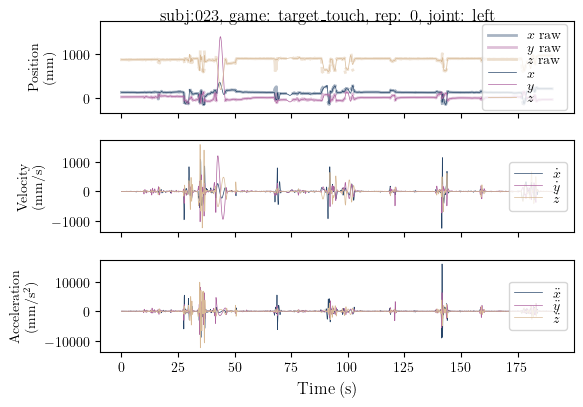

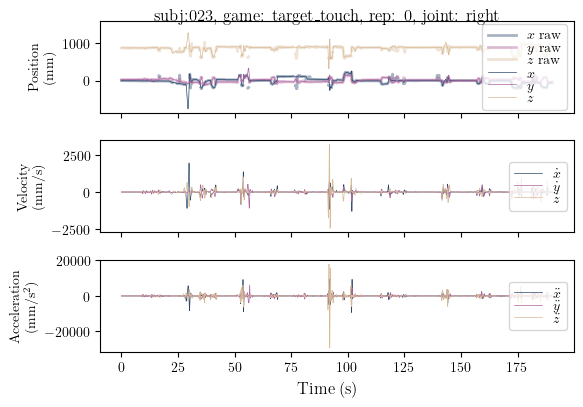

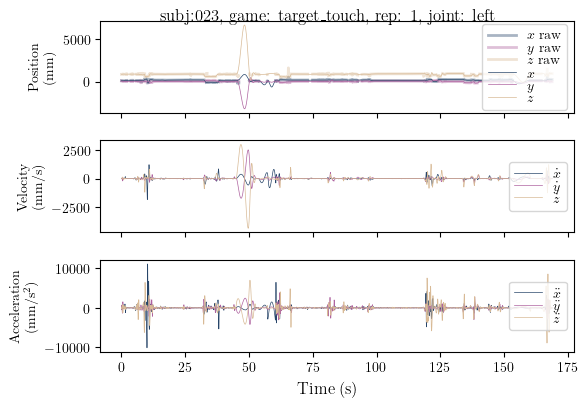

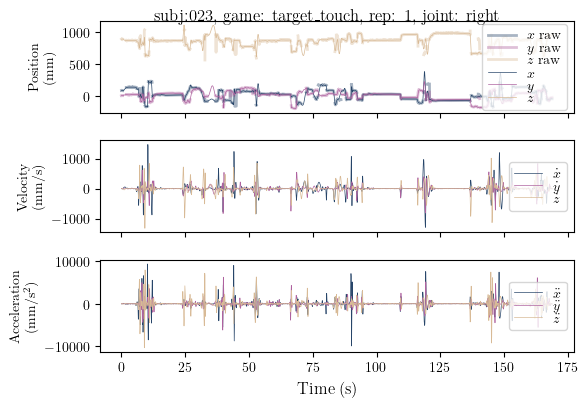

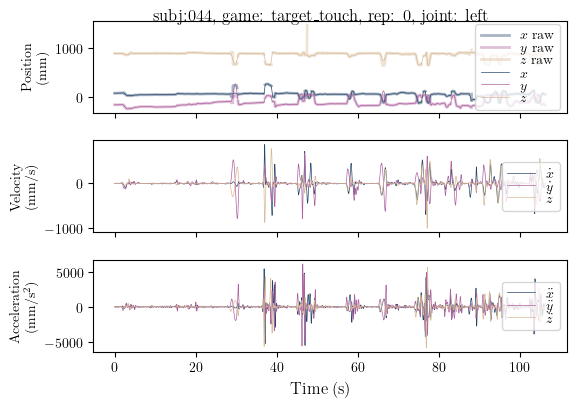

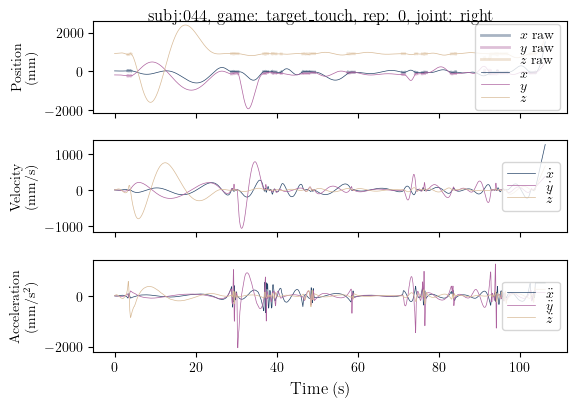

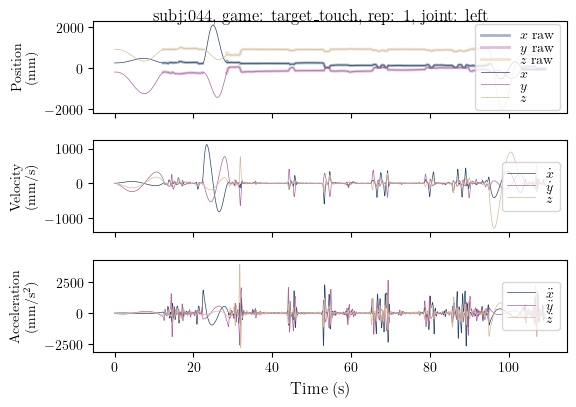

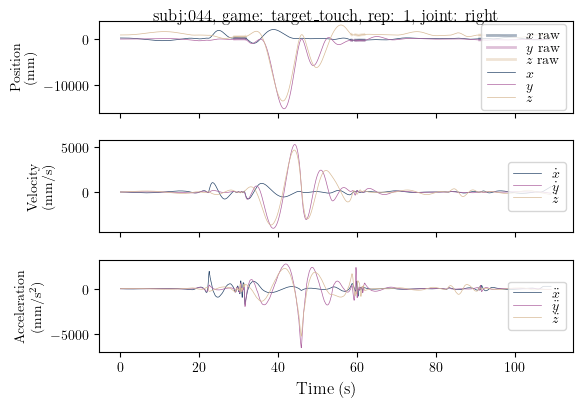

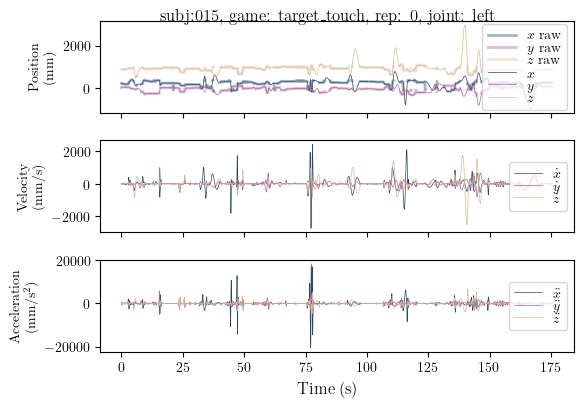

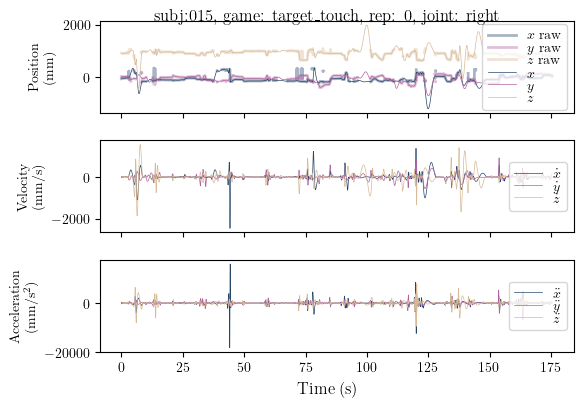

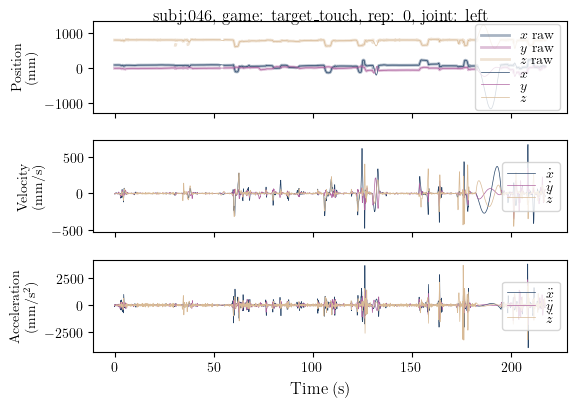

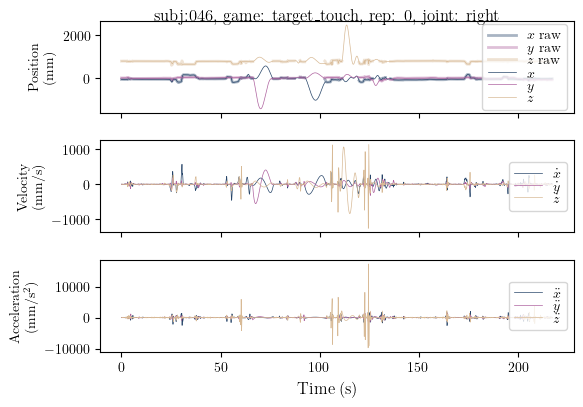

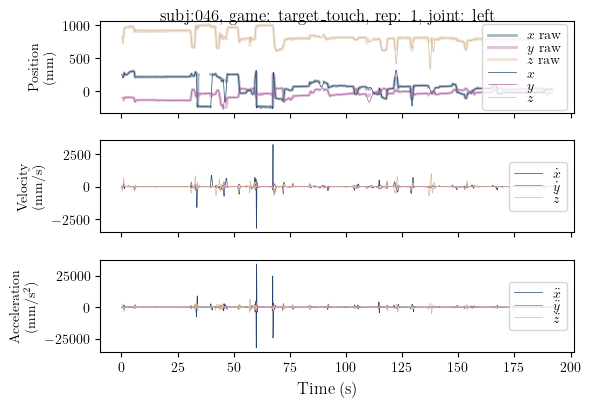

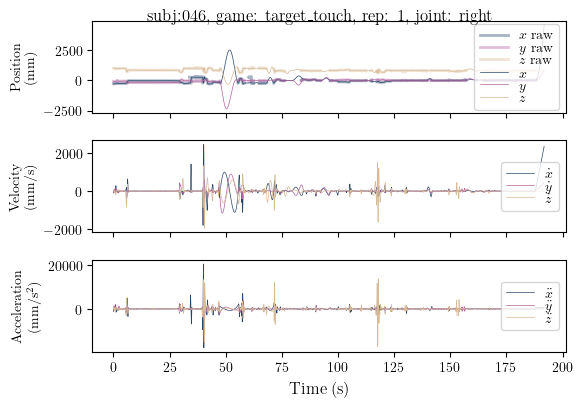

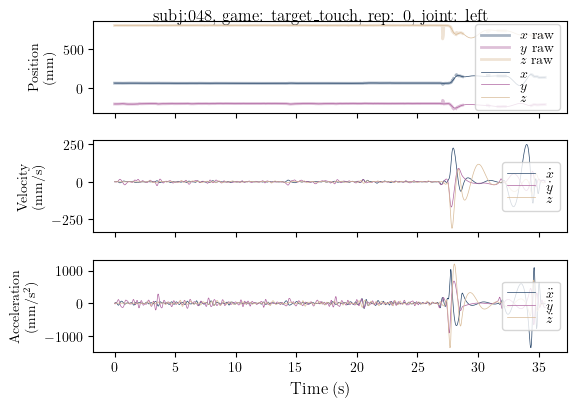

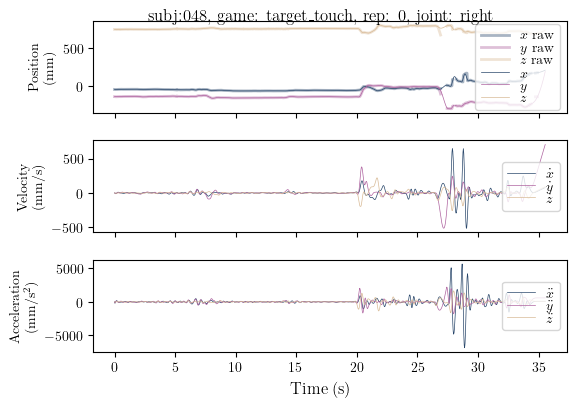

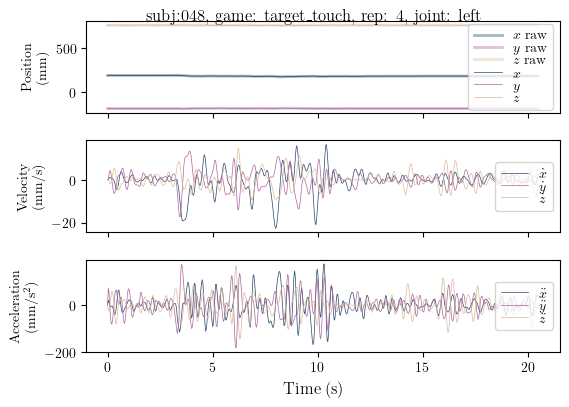

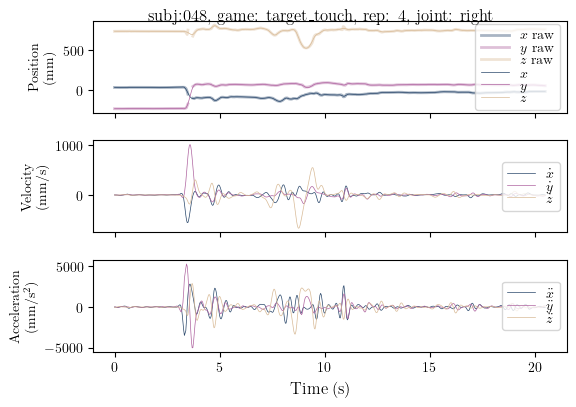

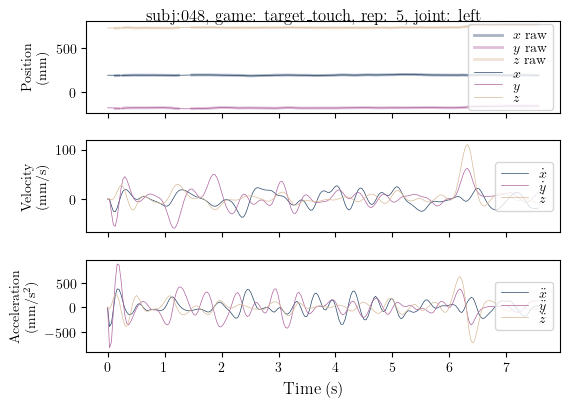

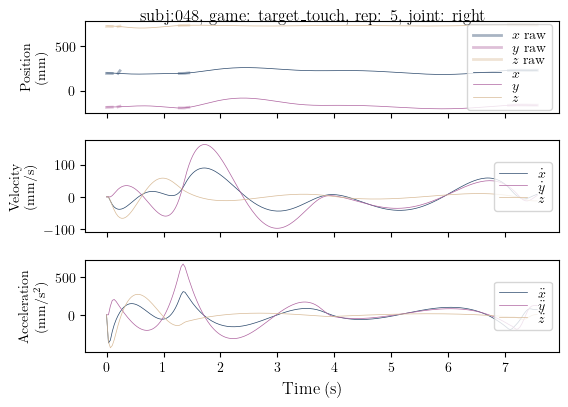

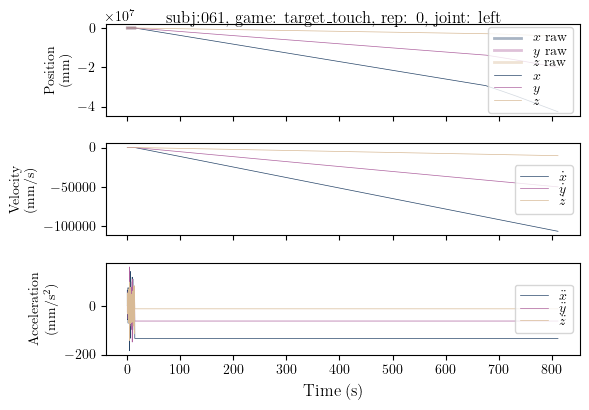

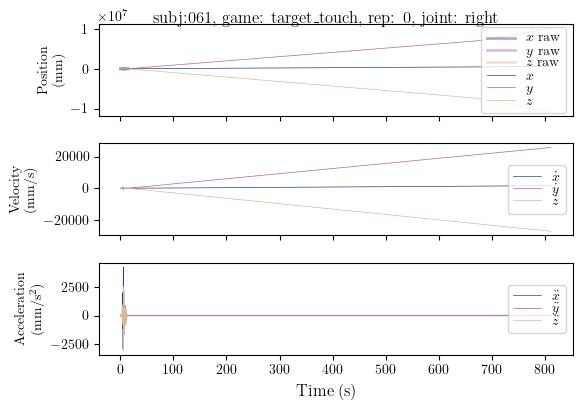

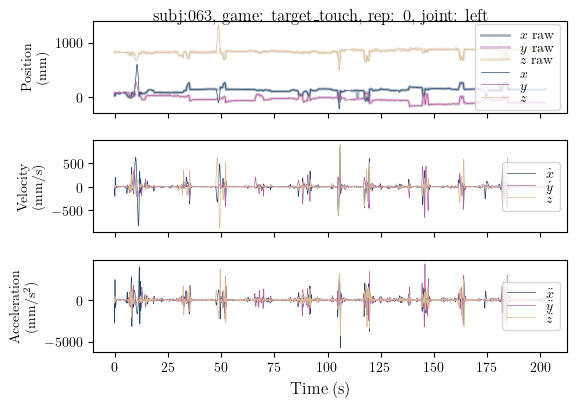

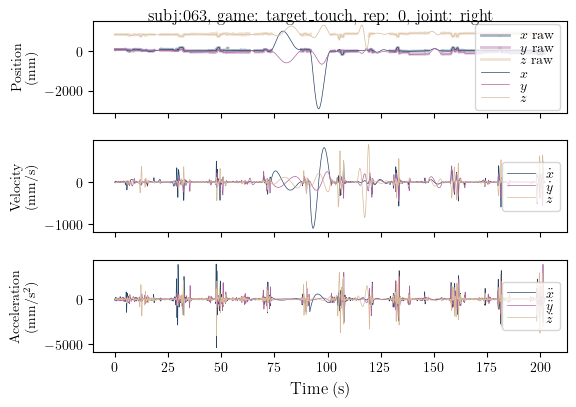

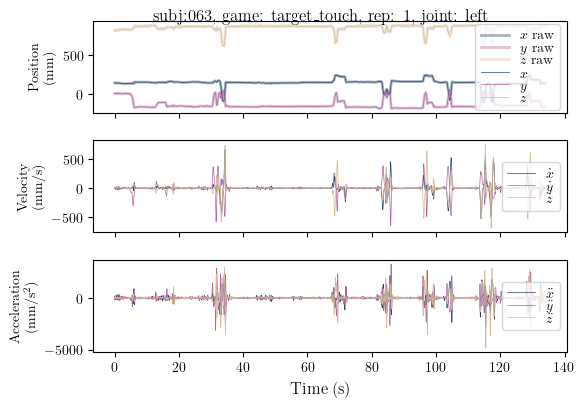

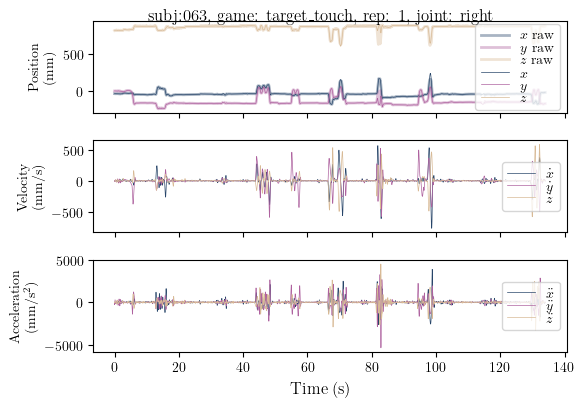

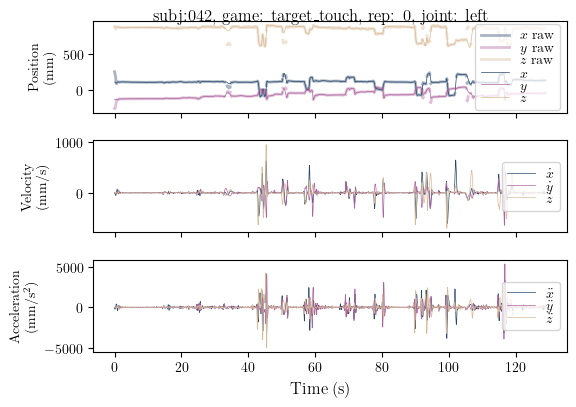

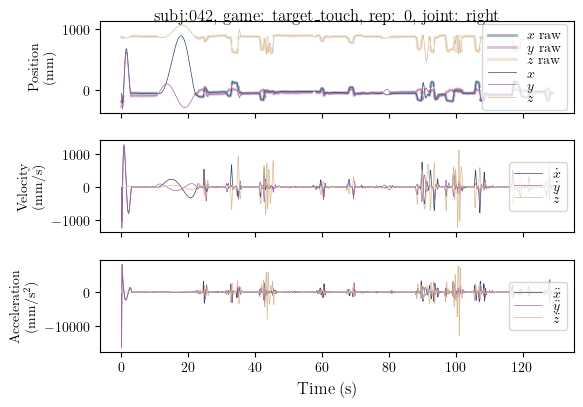

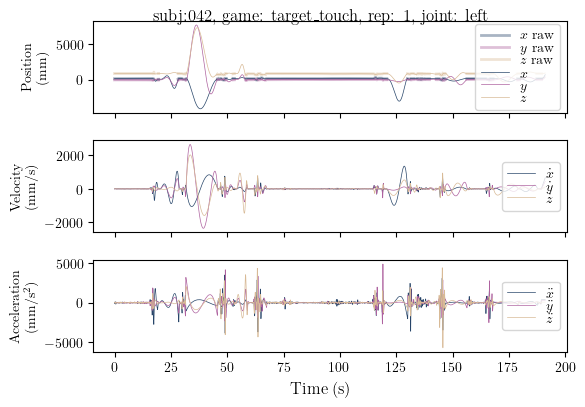

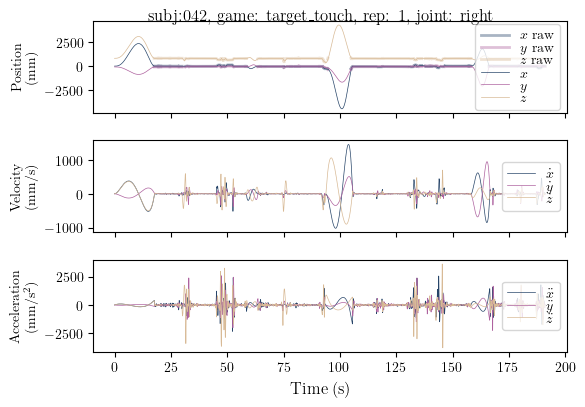

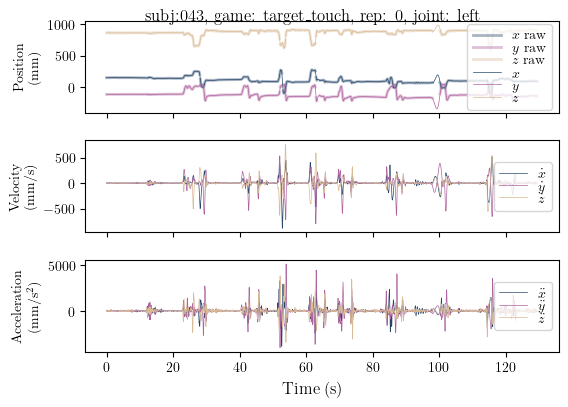

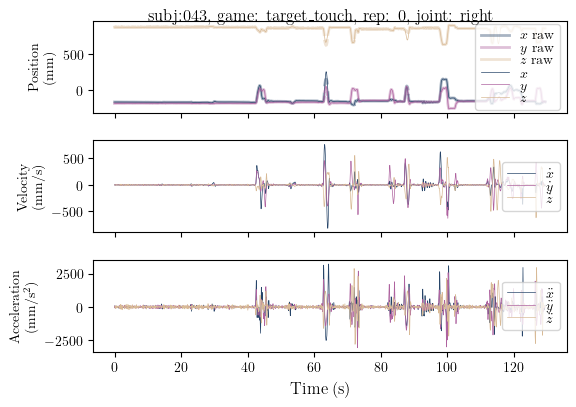

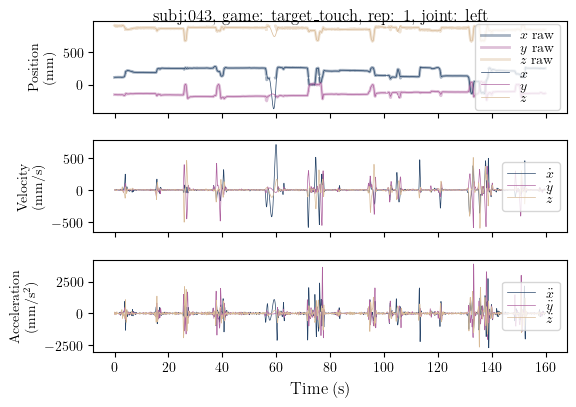

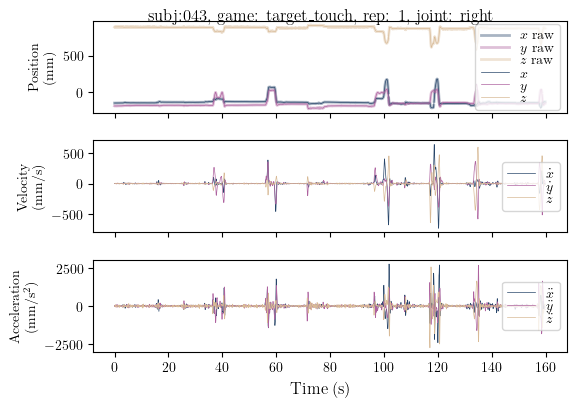

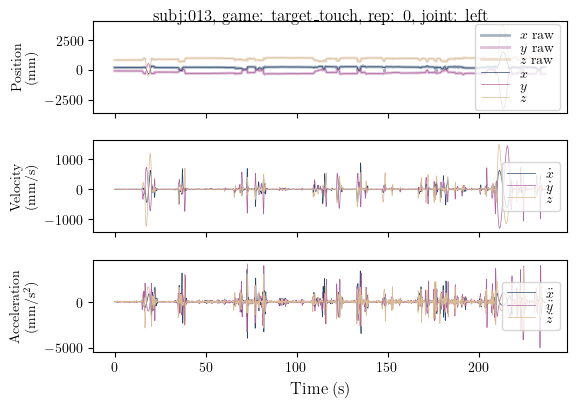

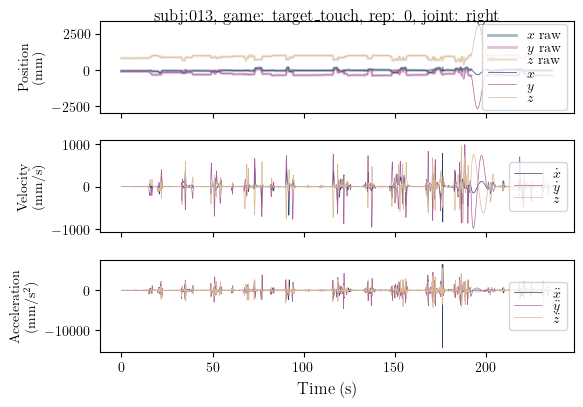

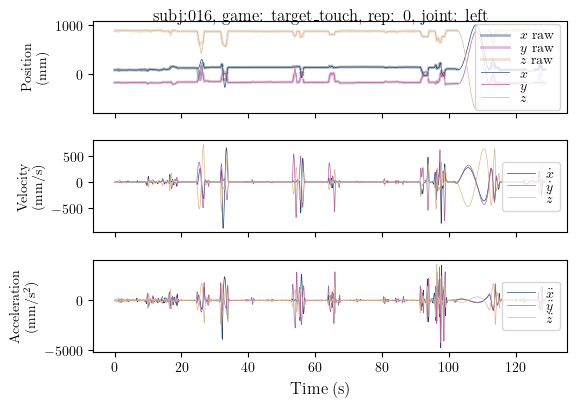

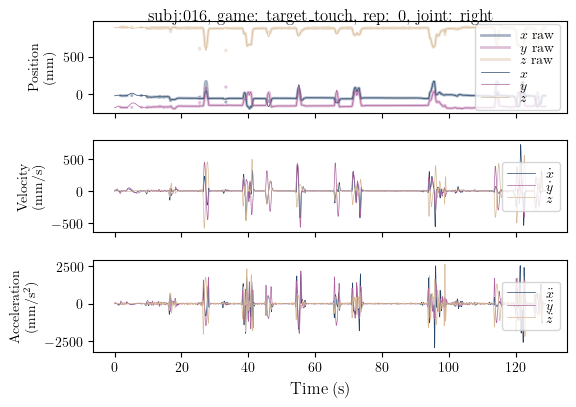

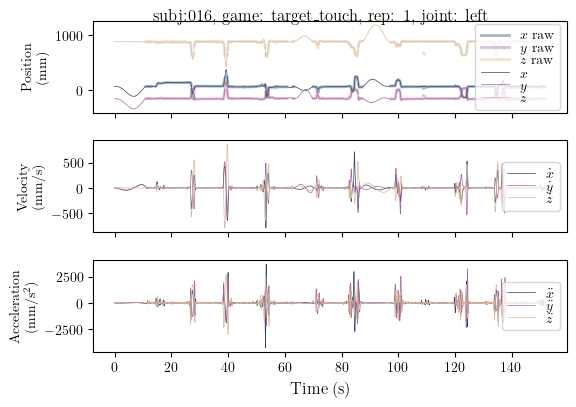

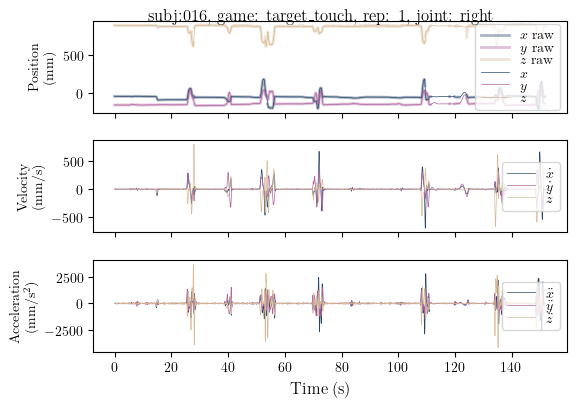

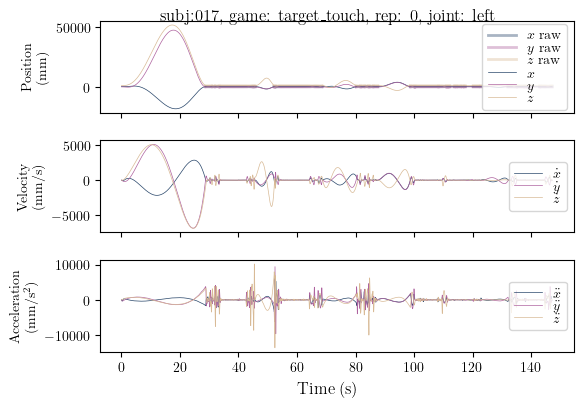

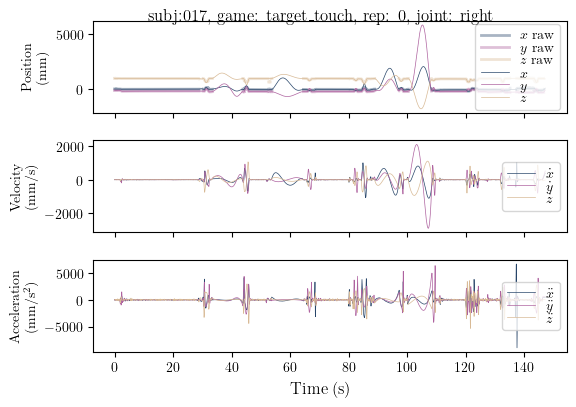

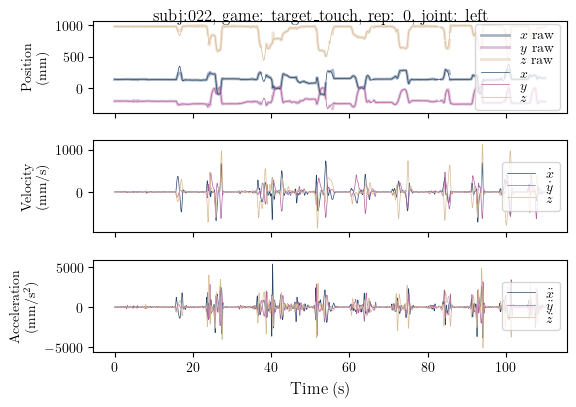

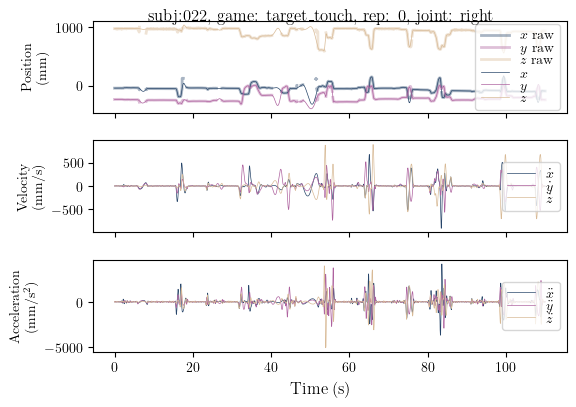

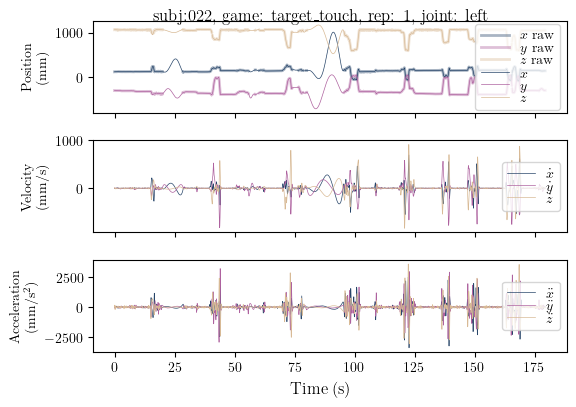

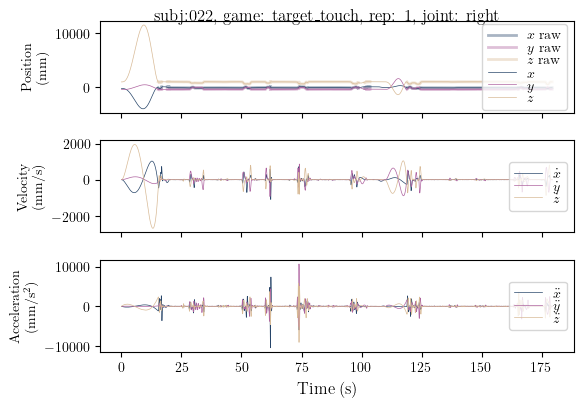

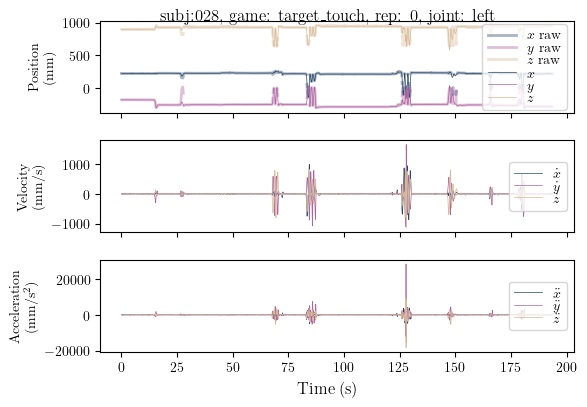

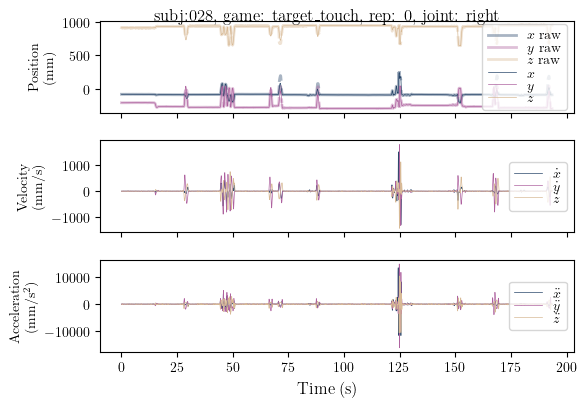

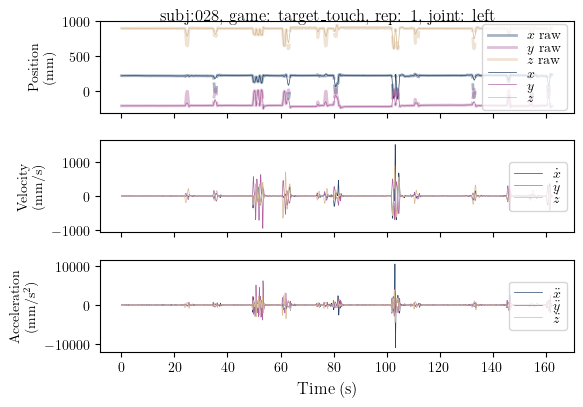

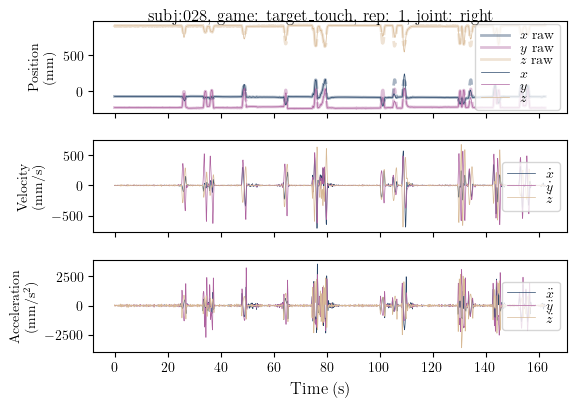

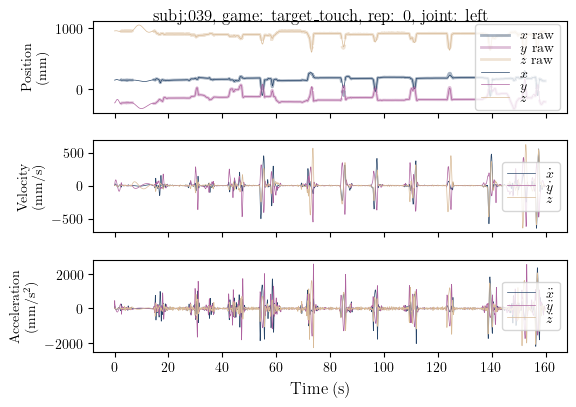

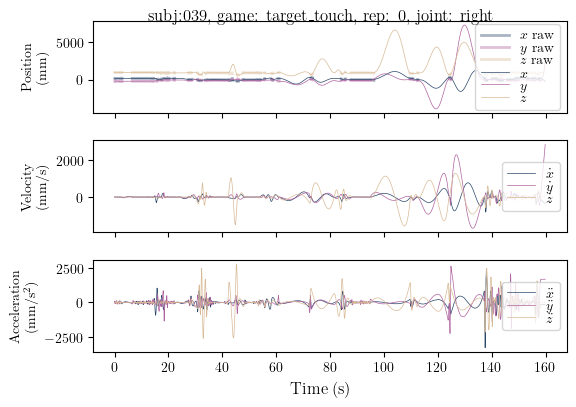

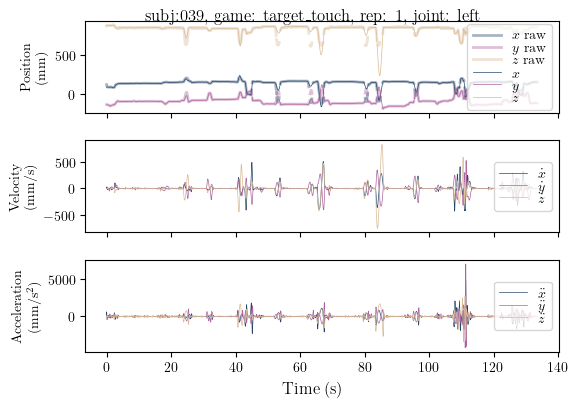

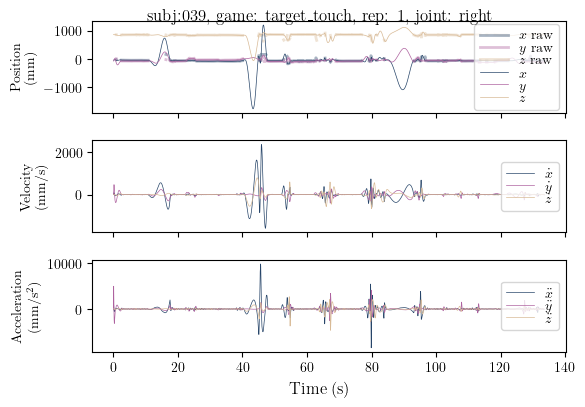

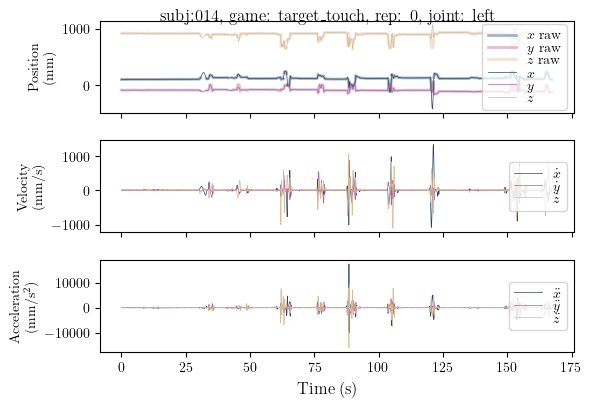

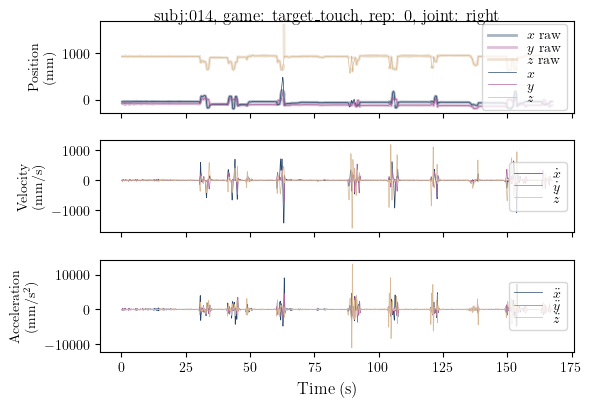

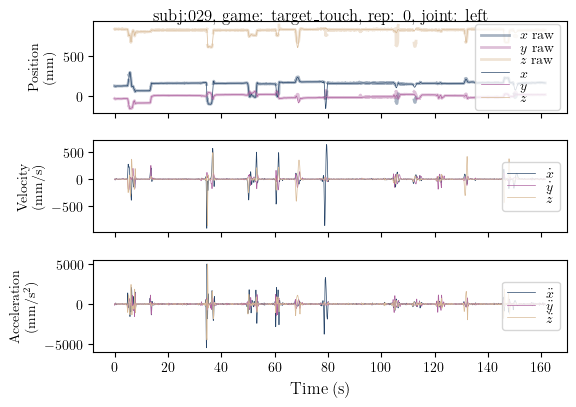

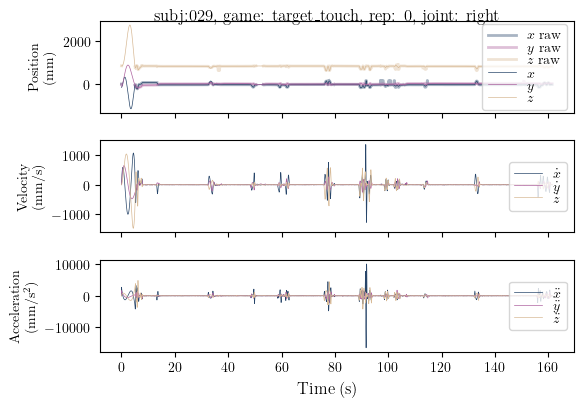

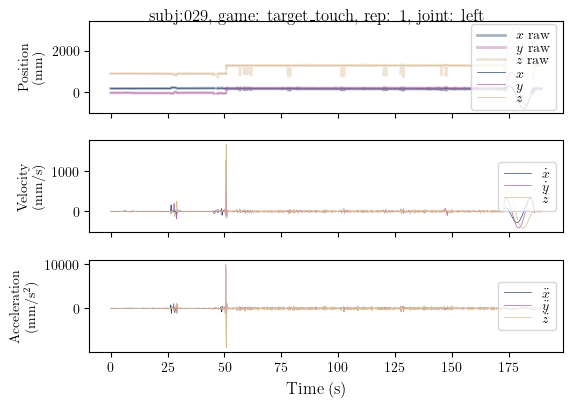

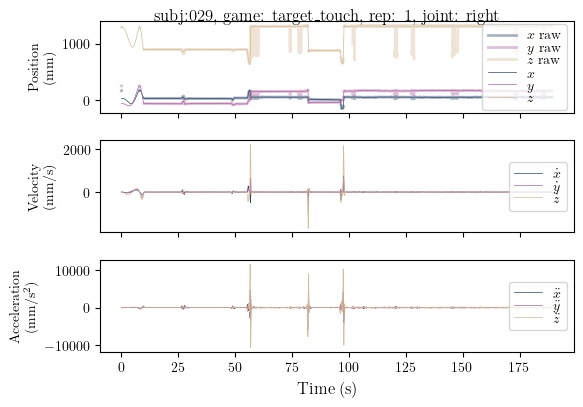

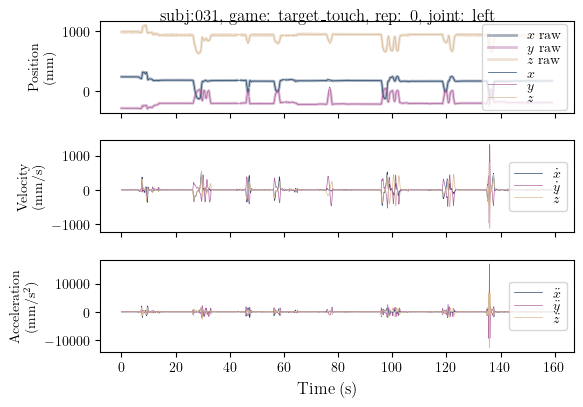

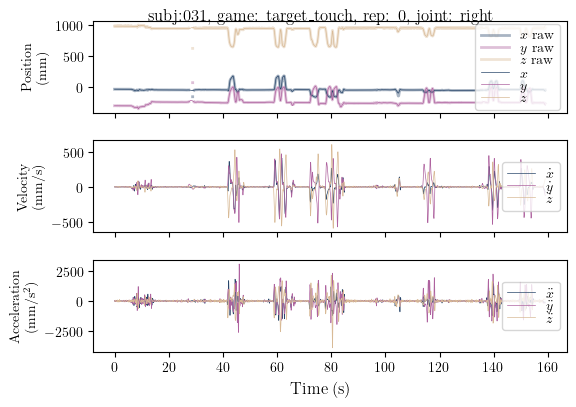

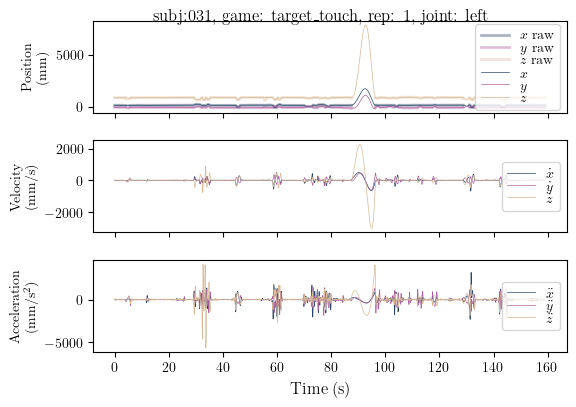

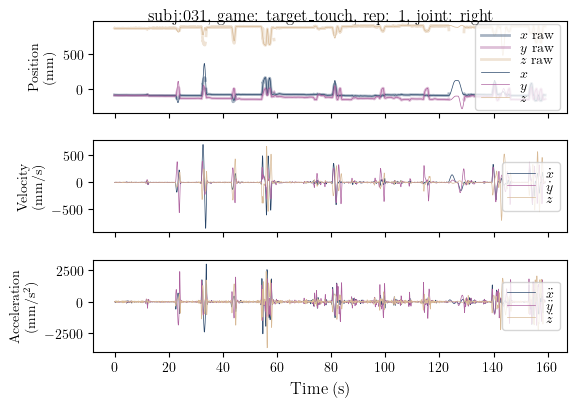

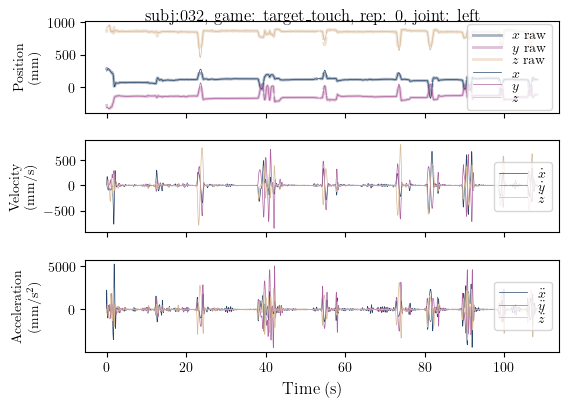

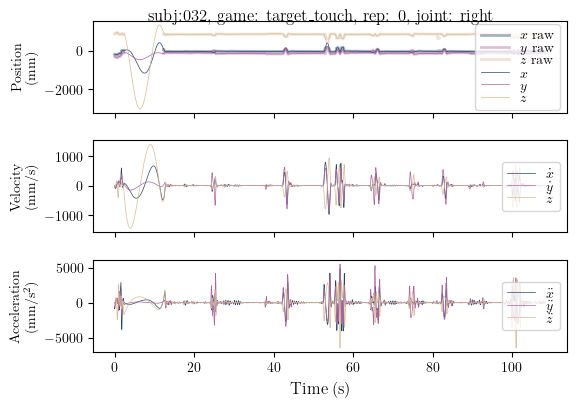

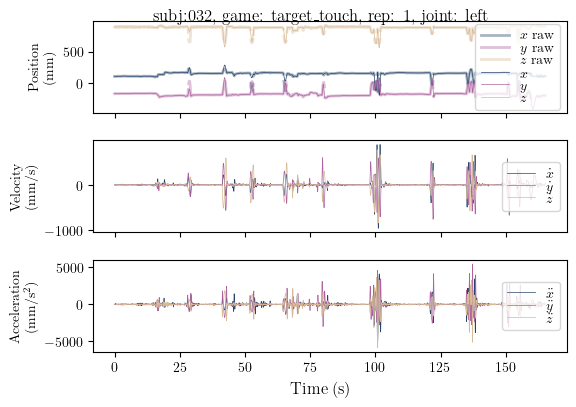

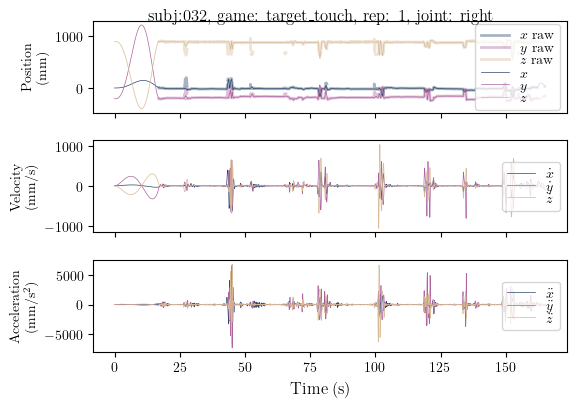

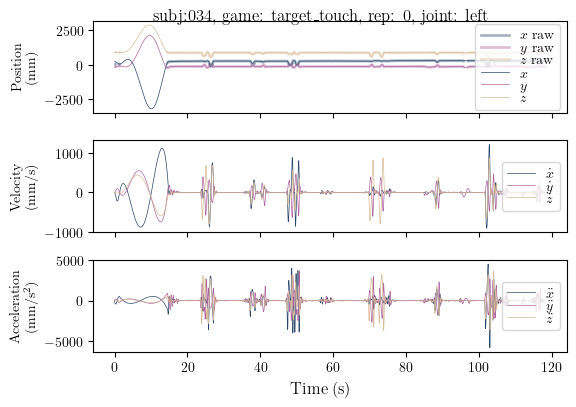

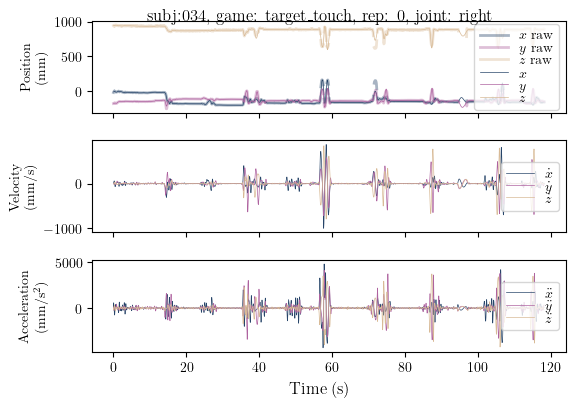

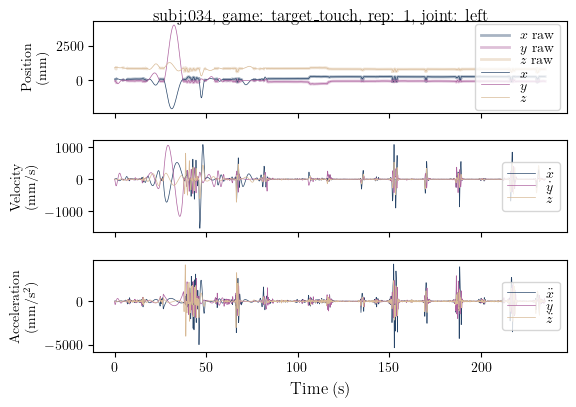

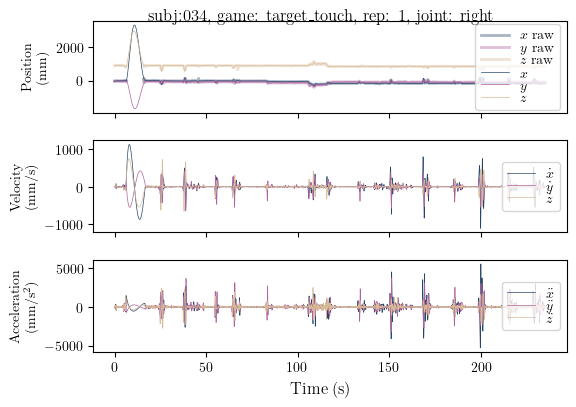

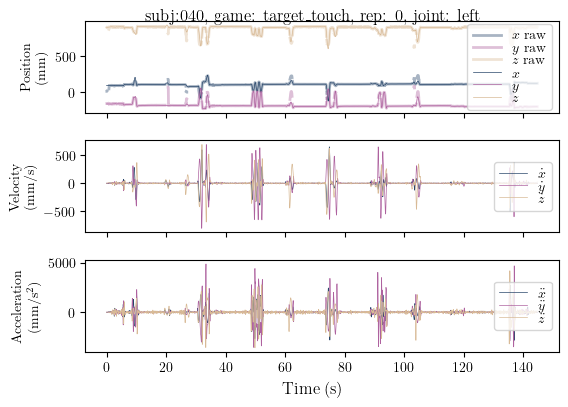

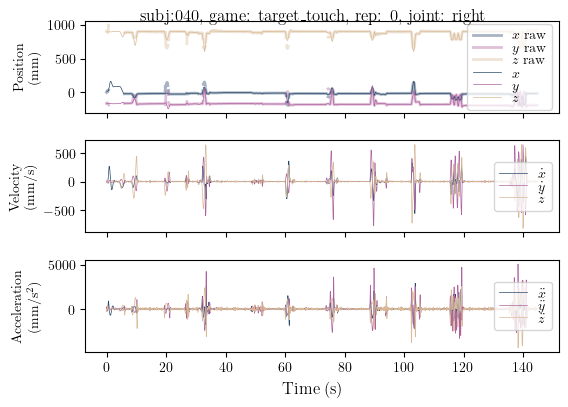

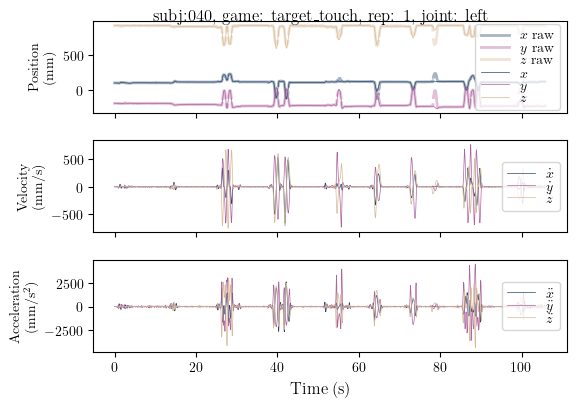

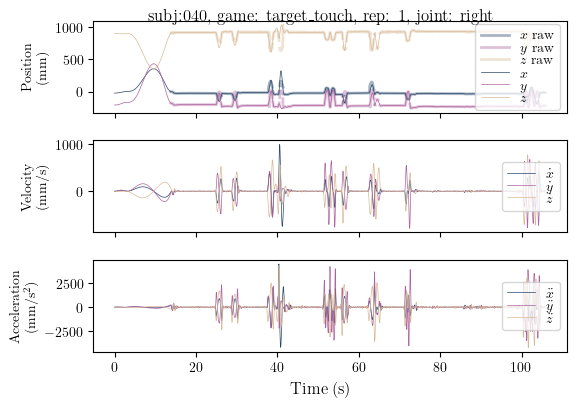

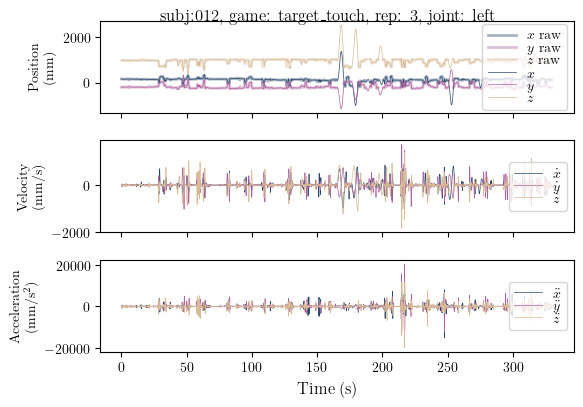

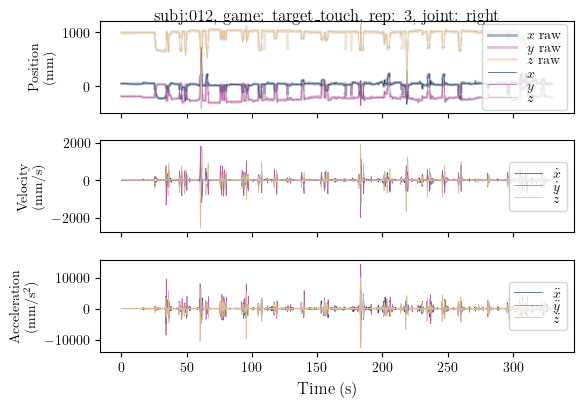

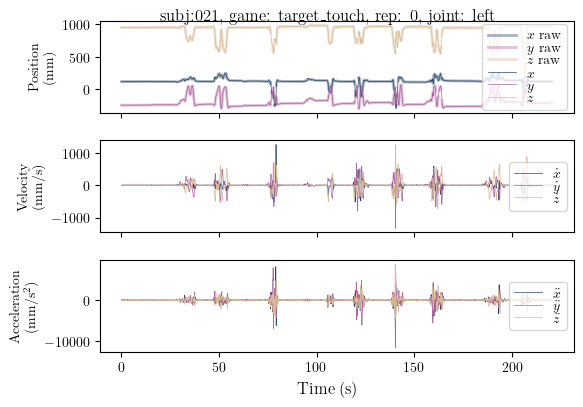

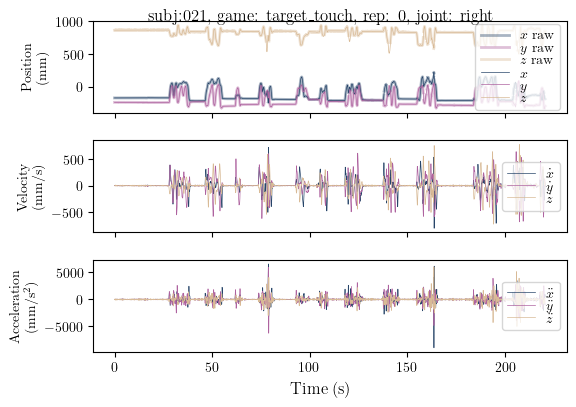

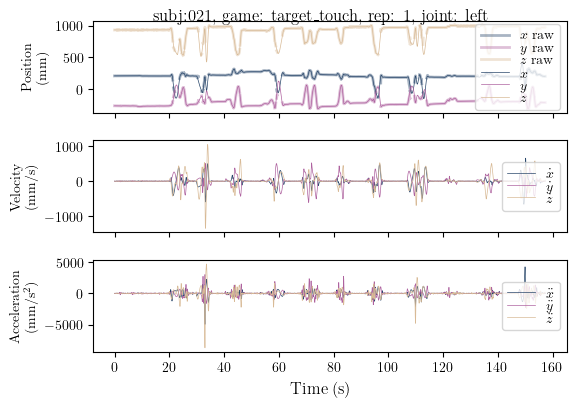

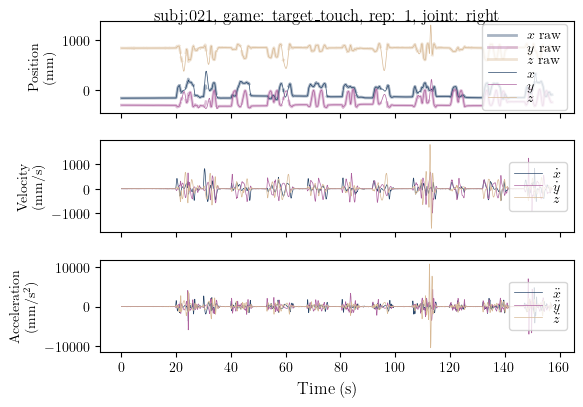

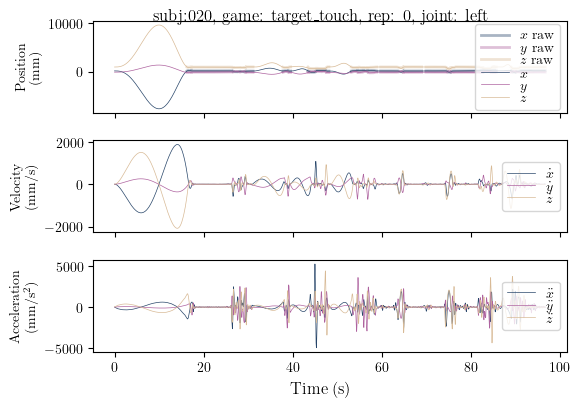

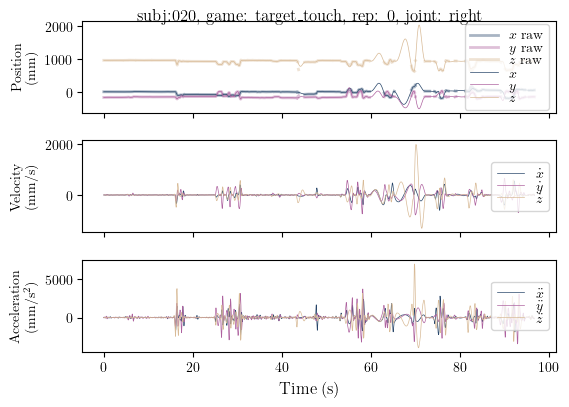

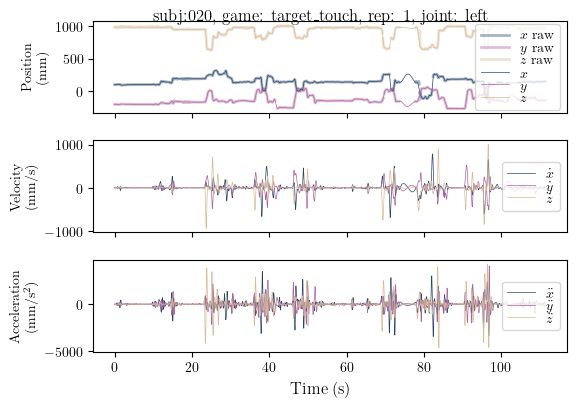

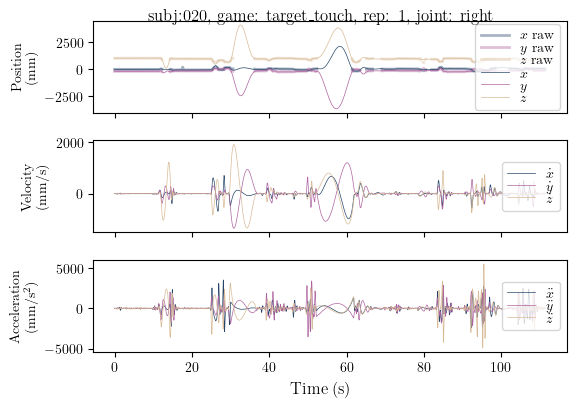

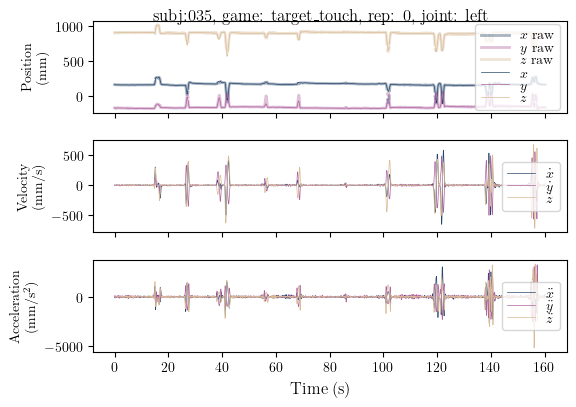

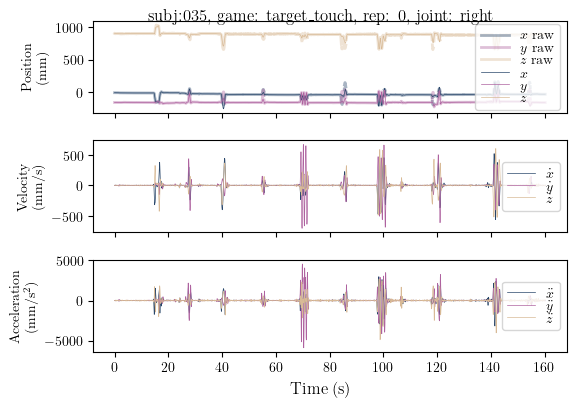

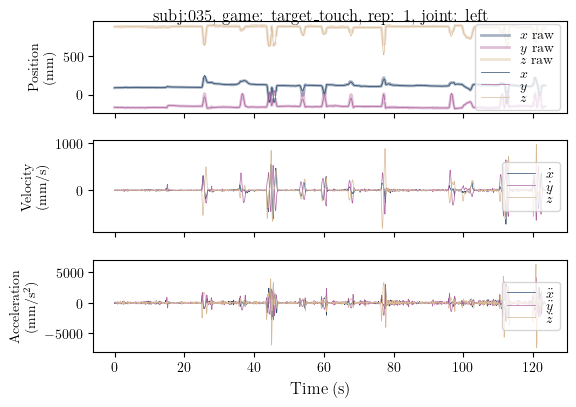

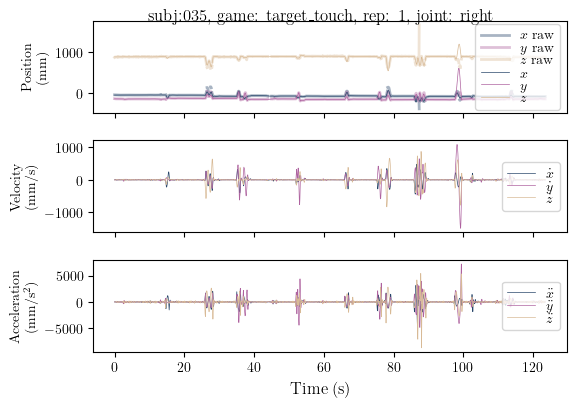

In [8]:
threshold=5
for subj in [f'0{id}' for id in train['record_id']]:
    for game_name in hdf5_file[subj]:
        if not game_name=='target_touch':
            continue
        games=hdf5_file[subj][game_name]
        for rep in games:
            game_rep=games[rep]
            if 'smooth' in game_rep:
                for joint in game_rep['smooth']:
                    # we only really want to filter by position variance
#                     low_conf_values=arm_length.filter_by_variance(game_rep['covariance'][joint][:,:3,:3],threshold=20000)
                    masked_data=np.ma.array(game_rep['smooth'][joint])
#                     masked_data[low_conf_values]=np.ma.masked
                    plotting.plot_model_results(game_rep['time'], game_rep['raw'][joint], masked_data, title=f'subj:{subj}, game: {game_name}, rep: {rep}, joint: {joint}')
                    plt.show()

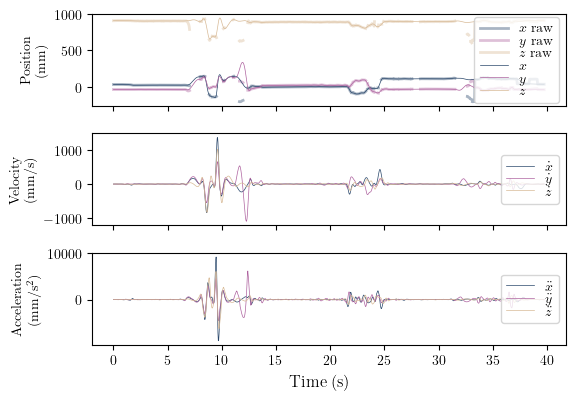

In [9]:
plotting.plot_model_results(hdf5_file['023']['target_touch']['0']['time'], hdf5_file['023']['target_touch']['0']['raw']['right'], hdf5_file['023']['target_touch']['0']['smooth']['right'],1090,1000)

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

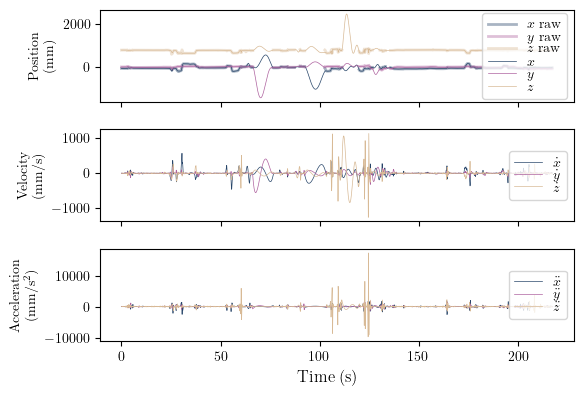

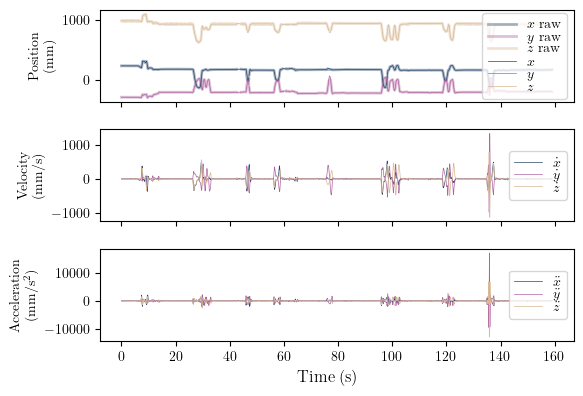

In [10]:
logging.getLogger('matplotlib.font_manager').disabled = True

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")


    for subj, rep, arm in [('046','0','right'),('031','0','left')]:
        plotting.plot_model_results(hdf5_file[subj]['target_touch'][rep]['time'], hdf5_file[subj]['target_touch'][rep]['raw'][arm], hdf5_file[subj]['target_touch'][rep]['smooth'][arm])
        plt.savefig(pathlib.Path.home()/f'Downloads/tt_plots/{subj}-{rep}-{arm}.pgf', format='pgf',bbox_inches="tight")


In [11]:
subj='023'
game_rep=hdf5_file[subj]['target_touch']['0']
data = game_rep['smooth'][joint]
raw_data=game_rep['raw'][joint]
time=game_rep['time']

velocity = np.sqrt(
    np.sum(np.power(data[:, 3:6], 2), axis=1))
acceleration = np.sqrt(
    np.sum(np.power(data[:, 6:9], 2), axis=1))

edges=np.diff(1*(velocity>100))
start_idx=np.where(edges==1)[0]
end_idx=np.where(edges==-1)[0]
if start_idx[0]>end_idx[0]:
    start_idx=np.insert(start_idx,0,0)
if len(start_idx)>len(end_idx):
    end_idx=np.append(end_idx,len(data)-1)

start_idx_2=[]
end_idx_2=[]
for start, end in zip(start_idx, end_idx):
    local_minima=start+scipy.signal.argrelextrema(velocity[start:end], np.less)[0]
    local_minima=np.insert(local_minima,0,start)
    local_minima=np.append(local_minima,end)
    for idx in range(len(local_minima)-1):
        start_idx_2.append(local_minima[idx])
        end_idx_2.append(local_minima[idx+1])
start_idx=np.array(start_idx_2)
end_idx=np.array(end_idx_2)

real_movements=[
    np.trapz(velocity[start:end], x=time[start:end])>200 for start, end in zip(start_idx, end_idx)]
start_idx=start_idx[real_movements]
end_idx=end_idx[real_movements]

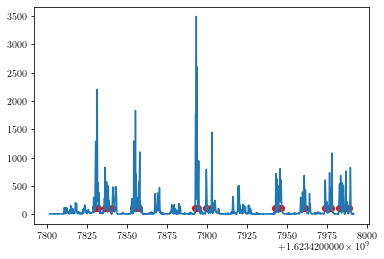

In [12]:
plt.plot(time[:],velocity)
plt.scatter(time[start_idx],np.ones(len(start_idx))*100,c='r')

In [13]:
len(start_idx)

33

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-703-726.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

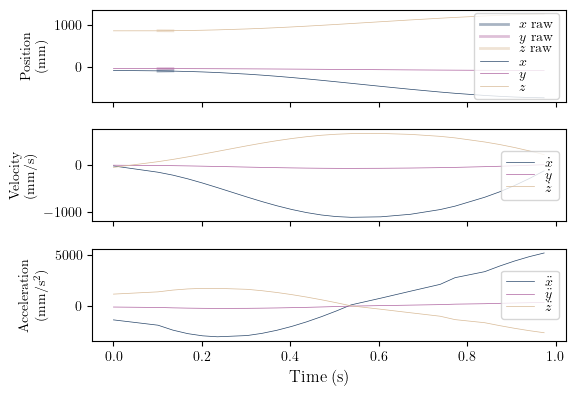

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-726-745.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

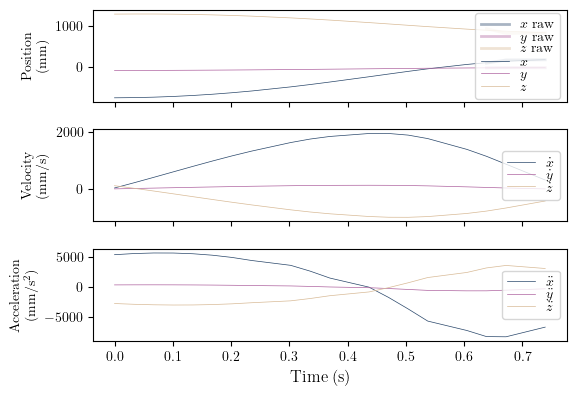

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-745-757.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

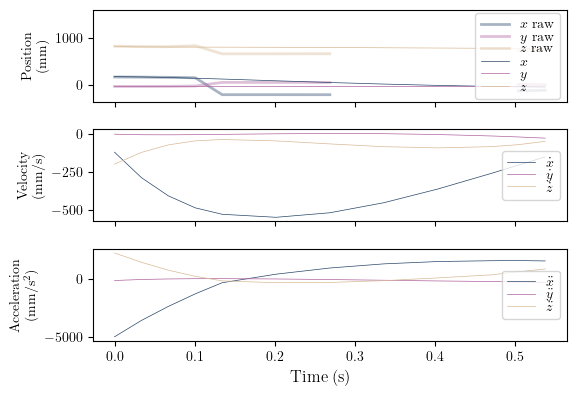

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-854-871.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

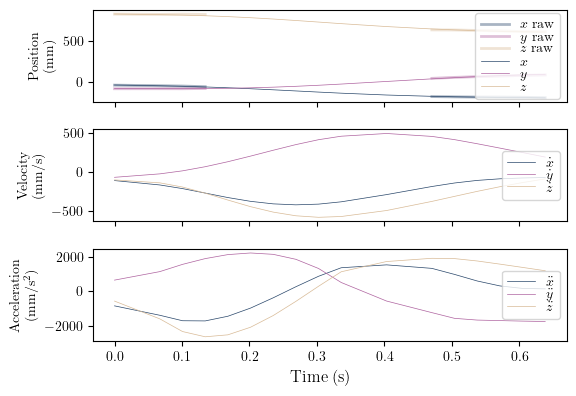

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-872-892.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

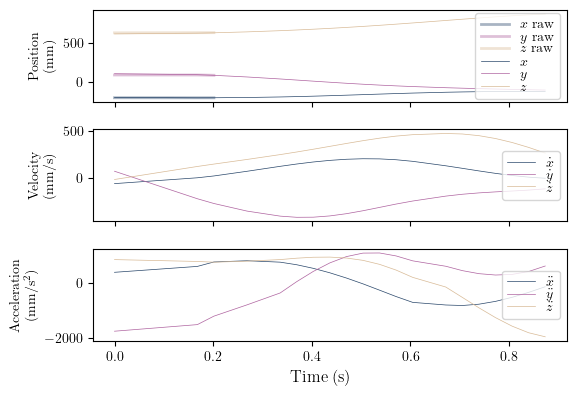

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-895-915.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

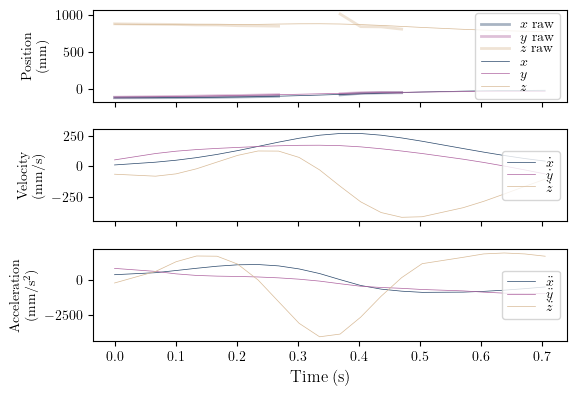

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-967-991.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

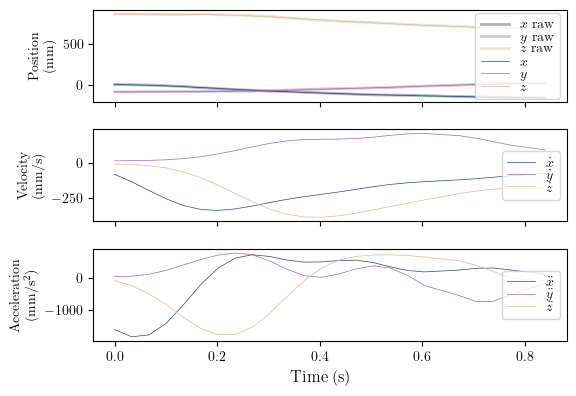

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-1301-1317.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

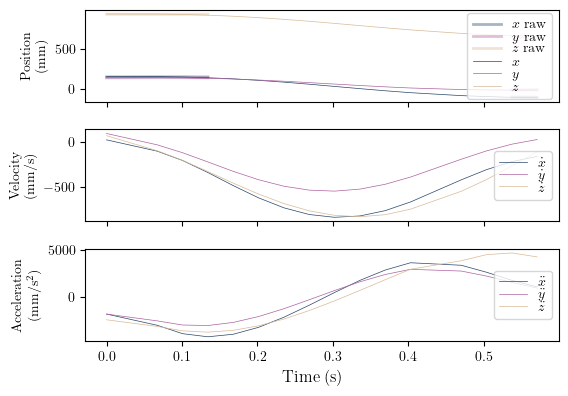

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-1331-1344.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

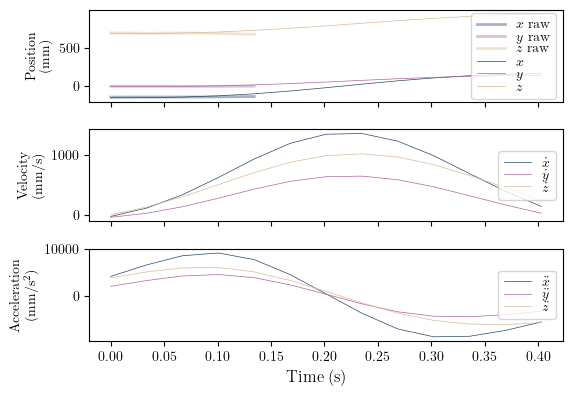

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-1377-1390.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

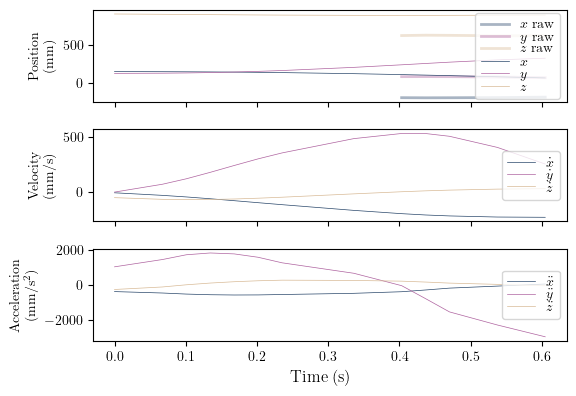

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-1390-1404.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

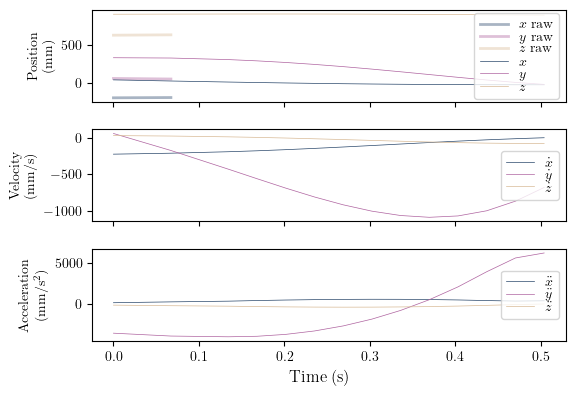

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2275-2288.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

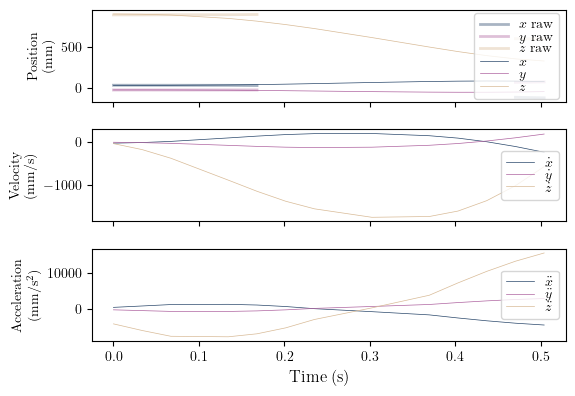

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2288-2300.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

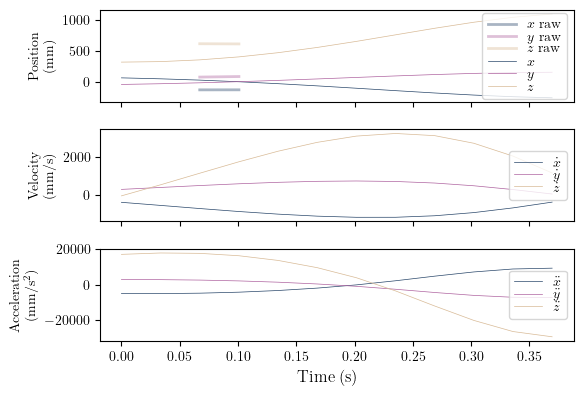

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2300-2309.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

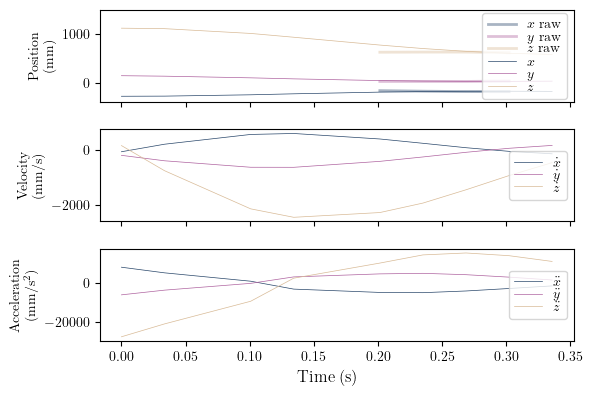

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2315-2340.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

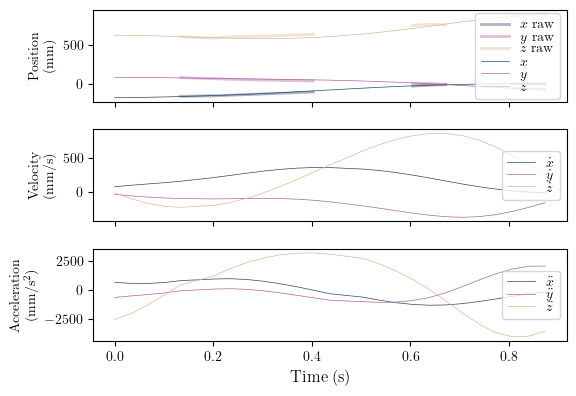

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2451-2476.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

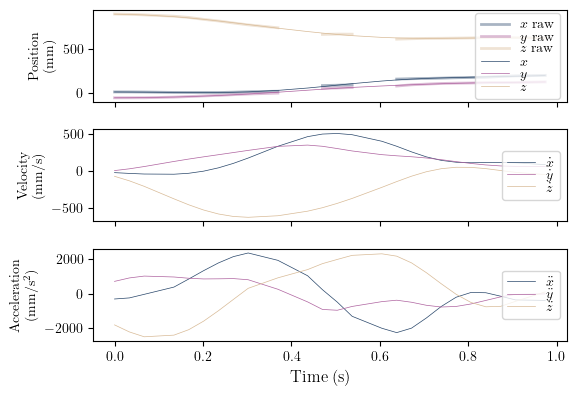

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2535-2544.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

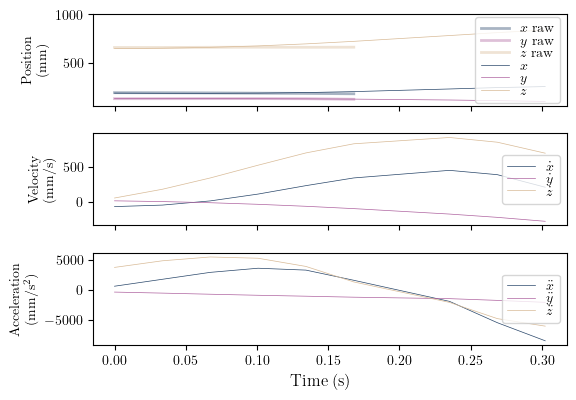

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-2544-2553.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

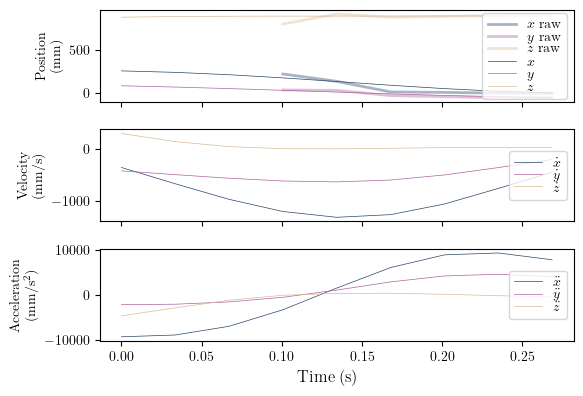

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-3531-3546.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

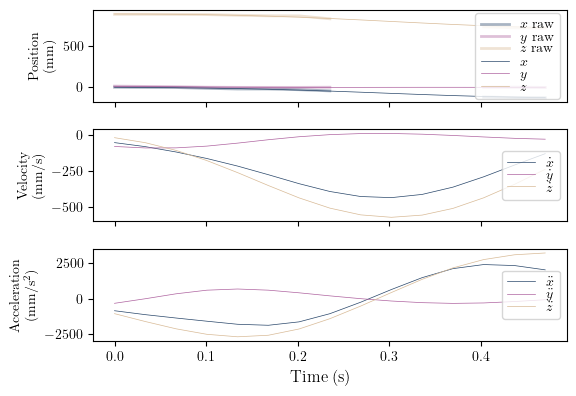

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-3603-3614.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

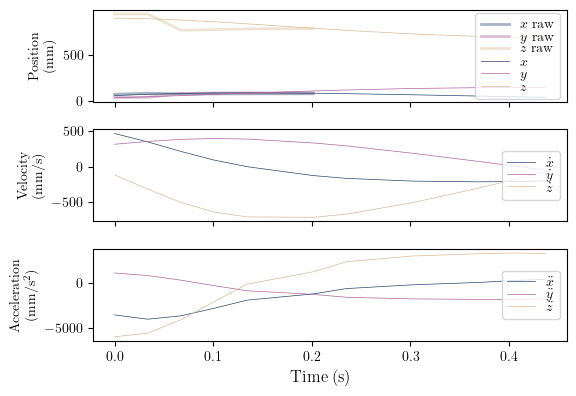

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-3614-3630.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

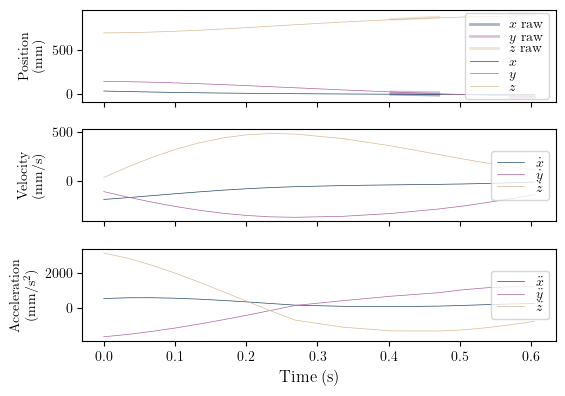

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-3977-3994.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

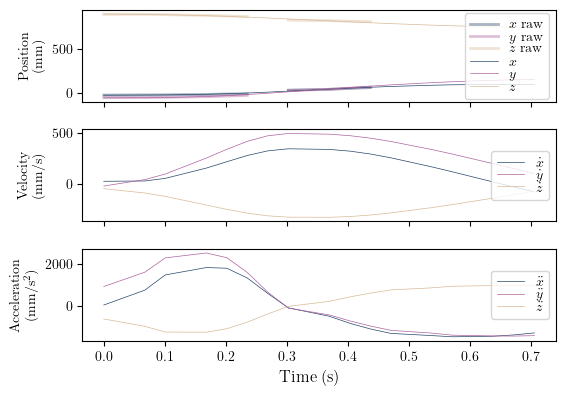

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-3994-4010.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

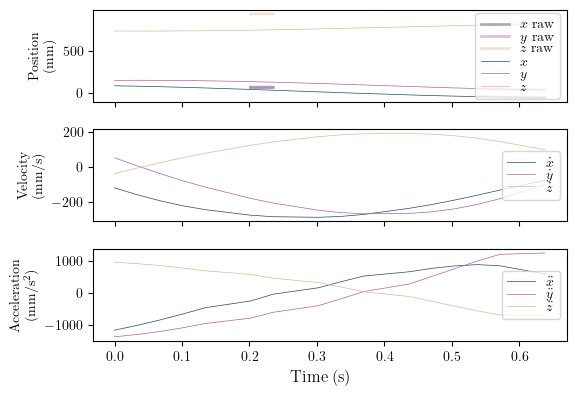

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4308-4335.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

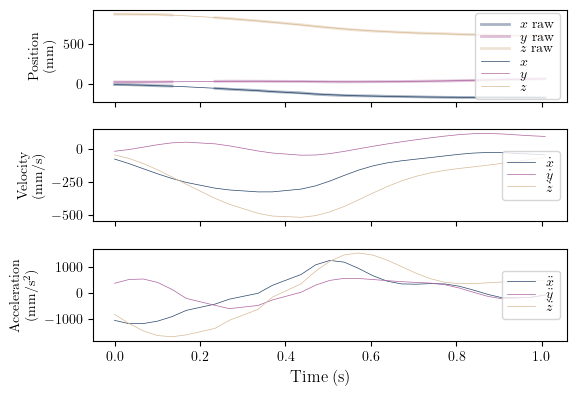

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4378-4391.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

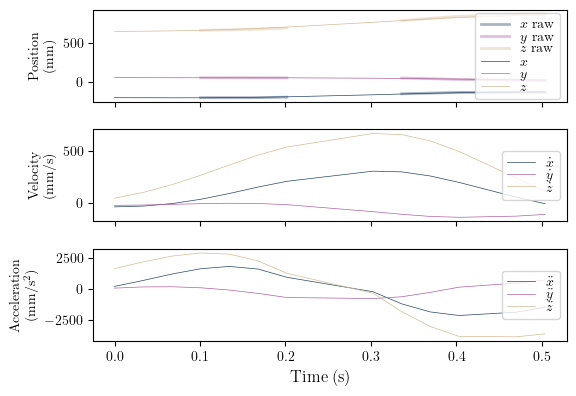

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4391-4411.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

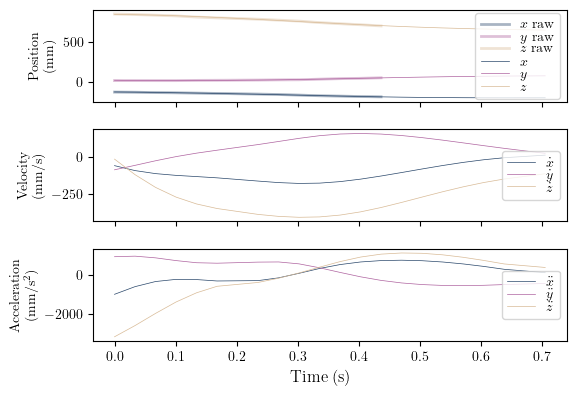

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4416-4429.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

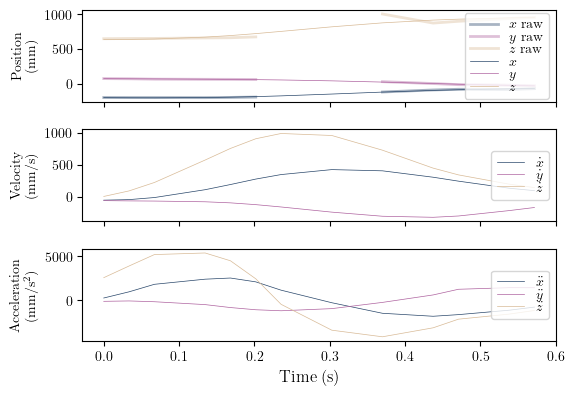

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4527-4547.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

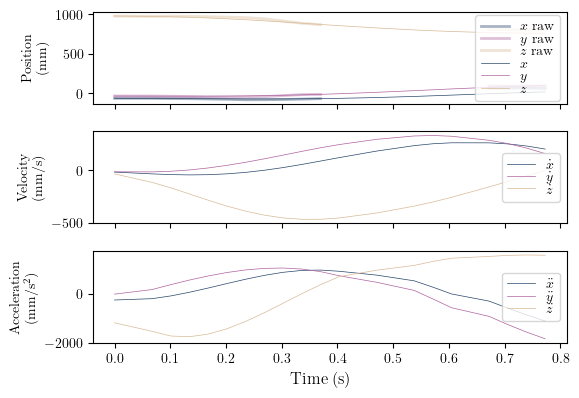

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4547-4567.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

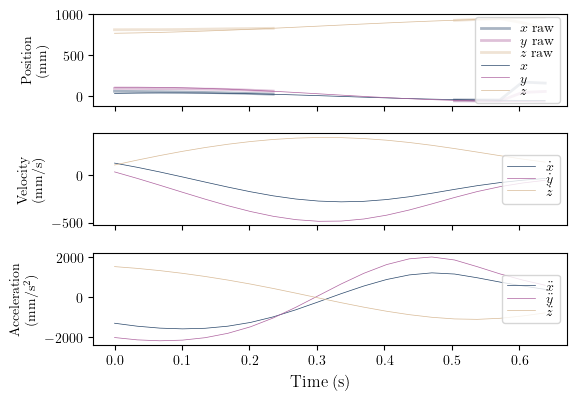

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4573-4592.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

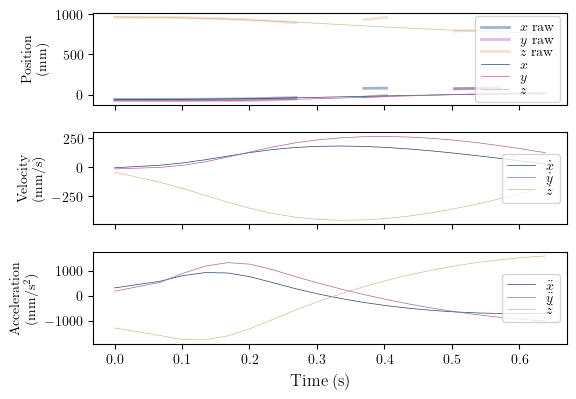

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4594-4614.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

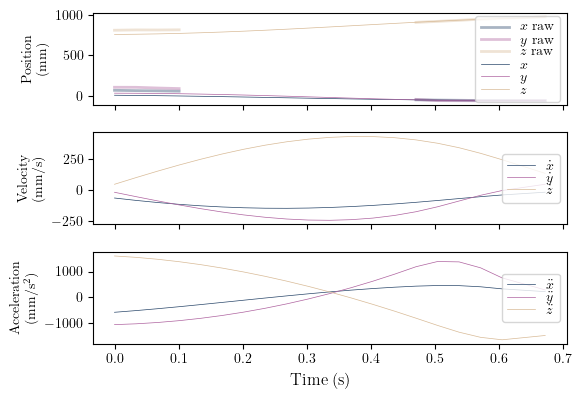

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4637-4654.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

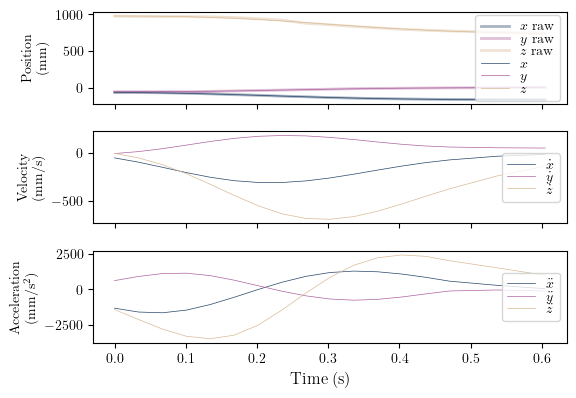

Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

saving to Downloads/tt_plots/023-4693-4714.pgf


Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring unknown font: Computer Modern Roman
Ignoring u

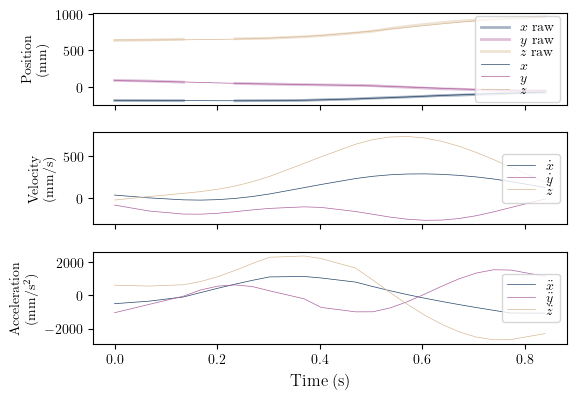

In [14]:
for start, end in zip(start_idx, end_idx):
#     plotting.plot_model_results(time, raw_data, data,start,end-start,title=str(np.trapz(velocity[start:end], x=time[start:end])))
    plotting.plot_model_results(time, raw_data, data,start,end-start)
    fn=f'Downloads/tt_plots/{subj}-{start}-{end}.pgf'
    print(f'saving to {fn}')
    plt.savefig(pathlib.Path.home()/fn, format='pgf',bbox_inches="tight")
    plt.show()